In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "SHOP"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-20,1.700,1.700,1.700,1.700,1.700,0
2015-05-21,2.800,2.874,2.411,2.568,2.568,123039000
2015-05-22,2.607,3.110,2.600,2.831,2.831,28412000
2015-05-26,2.980,3.034,2.908,2.965,2.965,8202000
2015-05-27,3.067,3.081,2.700,2.750,2.750,7976000


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-05-20 to 2023-05-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2009 non-null   float64
 1   High       2009 non-null   float64
 2   Low        2009 non-null   float64
 3   Close      2009 non-null   float64
 4   Adj Close  2009 non-null   float64
 5   Volume     2009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 109.9 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-20,1.700,1.700,1.700,1.700,1.700,0
2015-05-21,2.800,2.874,2.411,2.568,2.568,123039000
2015-05-22,2.607,3.110,2.600,2.831,2.831,28412000
2015-05-26,2.980,3.034,2.908,2.965,2.965,8202000
2015-05-27,3.067,3.081,2.700,2.750,2.750,7976000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-05,57.299999,62.539001,57.020000,62.029999,62.029999,43079500
2023-05-08,61.599998,65.129997,61.290001,64.379997,64.379997,37097600
2023-05-09,63.480000,63.930000,62.360001,63.889999,63.889999,20442800
2023-05-10,64.309998,65.540001,63.160000,63.169998,63.169998,17461200
2023-05-11,62.400002,63.089001,61.580002,62.900002,62.900002,15699500


In [7]:
data.shape

(2009, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2.009000e+03
mean,42.138262,43.112323,41.086964,42.129845,42.129845,1.808207e+07
std,45.241597,46.148220,44.160245,45.166594,45.166594,1.523672e+07
min,1.700000,1.700000,1.700000,1.700000,1.700000,0.000000e+00
25%,8.715000,8.897000,8.551000,8.693000,8.693000,9.055000e+06
50%,26.042999,26.639999,25.479000,26.240000,26.240000,1.448600e+07
75%,57.500000,60.606998,55.601002,58.500000,58.500000,2.282500e+07
max,171.800003,176.291794,168.509506,169.059998,169.059998,2.089590e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

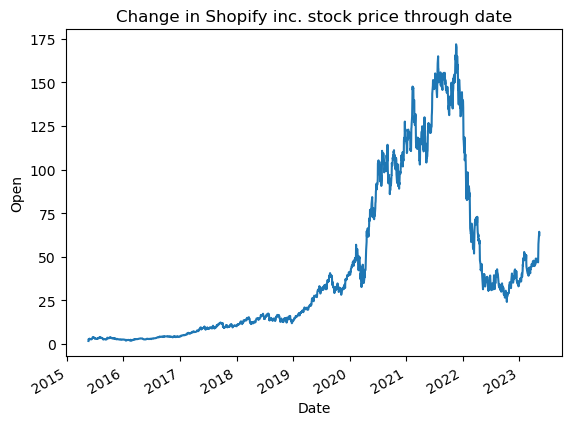

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Shopify inc. stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1506, 3), (503, 3))

In [15]:
y_train.shape,y_test.shape

((1506,), (503,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[110.27162941  27.67029984   4.22121014   7.16984004   4.74897011
   2.62375994 101.09862938  16.67364014   3.47371003  98.2471611
  44.72990993  92.93179016   2.98250998  42.23276981   3.97731004
  89.62453781  12.87212989  15.45156997 125.10029015 147.75588089
   2.70304002   3.07132995 109.5645697   29.80238022   9.48951997
  46.87023022  16.6782597    8.25921027   2.14093998  10.87347995
   3.11681997  37.06673054   9.41851005  33.37512985   2.77507995
  32.20088024 106.85887062  13.94772009  44.11677937  12.76407983
  94.14888115 154.76403793 143.27837006  90.29138016  14.36160989
   4.13887001 147.55770813 143.01446182  31.28110006  10.72752993
  43.20771065  49.2581797   13.52283998  35.22458969 138.08152908
   4.04067005 120.55279022  12.99168974 104.94314957  10.41552997
  60.37878933  30.86998968  33.4914101   14.56591986  39.05040016
   3.92844003  87.47713997   2.66138003   2.70525003  31.14836987
  33.61847954   3.08465996  12.74449976   2.71237998 149.20383057
  14.587169

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9994930292584189


In [22]:
y_test=list(y_test)

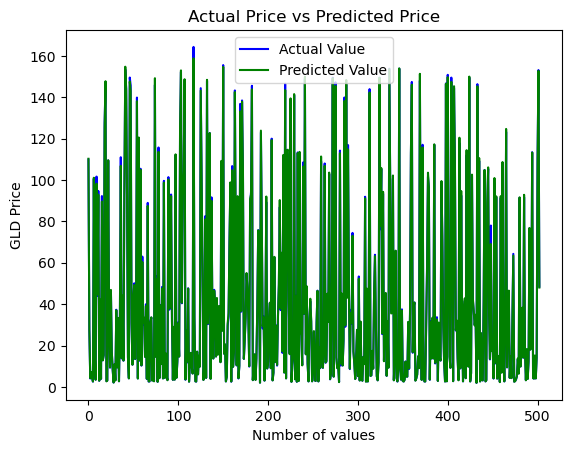

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

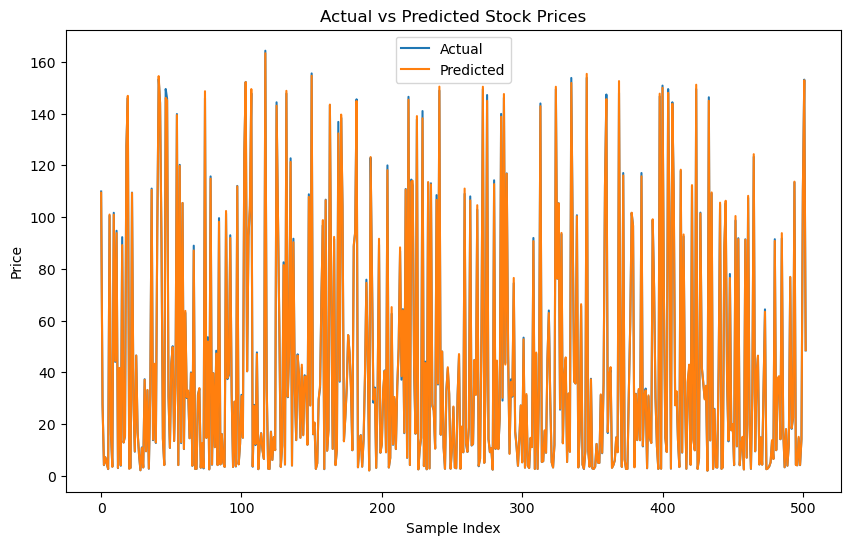

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 1.69040885,  2.55399554,  3.03513383, ..., 62.93097267,
       64.42563271, 62.29501562])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value32
enter a value232
enter a value23
206.40468564031335


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("SHOP_model.pkl",'wb')
pickle.dump(model,file)